In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support


In [21]:
# Load the dataset
data = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')

# Select relevant columns for the analysis (adjust as per dataset requirement)
features = ['HomeTeamGoals', 'AwayTeamGoals', 'HomeTeam Form', 'AwayTeam Form']
target = 'HomeTeamName'  # Assuming classification based on HomeTeamName

# Display the first few rows of the dataset to confirm
print(data[features + [target]].head())


   HomeTeamGoals  AwayTeamGoals  HomeTeam Form  AwayTeam Form    HomeTeamName
0              4              5            1.0            1.0          France
1              0              3            2.0            1.0  Czechoslovakia
2              2              0            3.0            3.0  Czechoslovakia
3              2              1            1.0            5.0    Soviet Union
4              2              1            1.0            3.0           Spain


In [23]:
# Example for two classes: France and Yugoslavia
class1 = data[data[target] == 'FranceÂ']
class2 = data[data[target] == 'Â Yugoslavia']

# Calculate centroids
centroid1 = np.mean(class1[features], axis=0)
centroid2 = np.mean(class2[features], axis=0)

# Calculate spread (standard deviation)
spread1 = np.std(class1[features], axis=0)
spread2 = np.std(class2[features], axis=0)

# Calculate interclass distance
distance_between_centroids = np.linalg.norm(centroid1 - centroid2)

print(f"Centroid 1: {centroid1}\nCentroid 2: {centroid2}")
print(f"Spread 1: {spread1}\nSpread 2: {spread2}")
print(f"Distance between centroids: {distance_between_centroids}")
S

Centroid 1: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Centroid 2: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Spread 1: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Spread 2: HomeTeamGoals   NaN
AwayTeamGoals   NaN
HomeTeam Form   NaN
AwayTeam Form   NaN
dtype: float64
Distance between centroids: nan


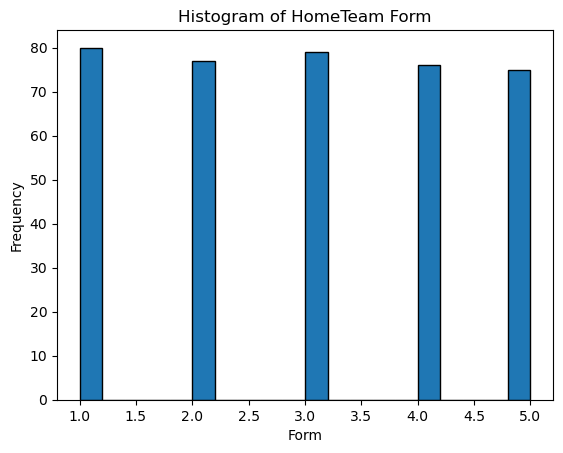

Mean: 2.9715762273901807
Variance: 1.9966081098224724


In [25]:
# Select a feature column, e.g., 'HomeTeam Form'
feature = data['HomeTeam Form']

# Plot histogram
plt.hist(feature, bins=20, edgecolor='black')
plt.title('Histogram of HomeTeam Form')
plt.xlabel('Form')
plt.ylabel('Frequency')
plt.show()

# Calculate mean and variance
mean = np.mean(feature)
variance = np.var(feature)

print(f"Mean: {mean}\nVariance: {variance}")


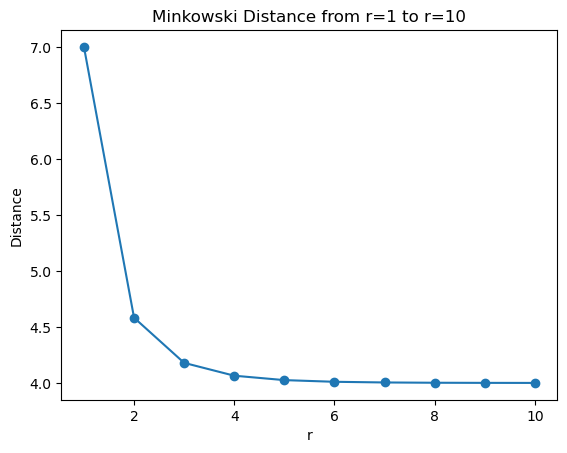

In [27]:
# Select two feature vectors (rows of data)
vector1 = data.iloc[0][features]
vector2 = data.iloc[1][features]

# Calculate Minkowski distances for r from 1 to 10
minkowski_distances = [np.linalg.norm(vector1 - vector2, ord=r) for r in range(1, 11)]

# Plot the distances
plt.plot(range(1, 11), minkowski_distances, marker='o')
plt.title('Minkowski Distance from r=1 to r=10')
plt.xlabel('r')
plt.ylabel('Distance')
plt.show()


In [29]:
# Prepare feature matrix X and labels y
X = data[features]  
y = data[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Drop rows with missing values in features or target
df = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')
df_clean = df.dropna(subset=['HomeTeamGoals', 'AwayTeamGoals', 'Attendance'])

# Define features and target
features = df_clean[['HomeTeamGoals', 'AwayTeamGoals']]
target = df_clean['Attendance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

In [41]:
df = pd.read_excel(r'D:\Academics\Sem 5\ML_Notes\Copy of finalized ml(1).xlsx')
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Drop rows with missing values in features or target
df_clean = df.dropna(subset=['HomeTeamGoals', 'AwayTeamGoals', 'Attendance'])

# Define features and target
features = df_clean[['HomeTeamGoals', 'AwayTeamGoals']]
target = df_clean['Attendance']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check for NaN values before fitting
print("Checking for NaN values...")
print(X_train.isna().sum())
print(y_train.isna().sum())

# Train kNN classifier with k=3 if no NaNs are present
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate accuracy on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy}")


Checking for NaN values...
HomeTeamGoals    0
AwayTeamGoals    0
dtype: int64
0
Accuracy: 0.0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Define features and target
features = df[['HomeTeamGoals', 'AwayTeamGoals']]
target = df['Attendance']

# Impute missing values in features
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Drop rows with missing values in the target variable
target_clean = target.dropna()

# Ensure that the corresponding rows are removed from features
features_imputed_clean = features_imputed[target_clean.index]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_imputed_clean, target_clean, test_size=0.2, random_state=42)

# Train kNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the classes of the test set
predictions = knn.predict(X_test)

# Print predictions
print(f"Predictions: {predictions}")


Predictions: [11504.  9896.  3869. 37096. 24540. 41000. 12413. 18497. 11504. 37096.
 11504. 24540. 41000. 37096. 41000. 12413. 46849. 37096. 24540. 30772.
 41000. 41000.  9847. 24540. 24540. 46849. 12413. 34736. 24540. 21128.
 27762. 18497. 37096. 21128. 41000. 16002. 41000. 46849. 21128. 46849.
  9847. 24540. 16002. 18497. 18497. 24540. 37096. 42711. 24540. 46849.
 37096. 29016. 16002. 11504. 41000. 37096. 13000.  3869. 41000. 27762.
 24540. 37096. 27762. 42711. 13000. 41000. 27762. 37096. 16002. 29016.
 29935. 41000. 16002.  9896. 34736. 37096.  3869. 42711.]


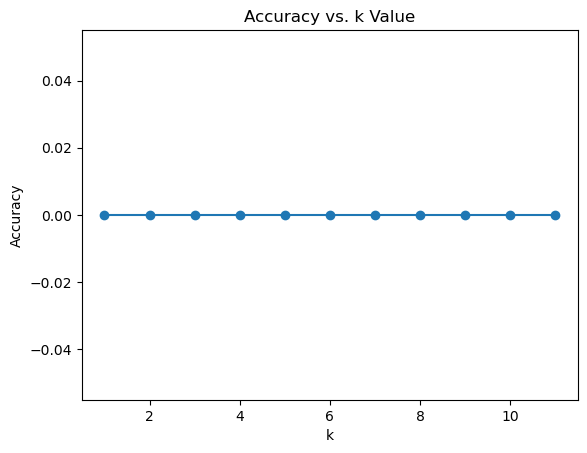

In [49]:
import numpy as np

# Create a mask to filter out rows with NaN values
mask = ~np.isnan(X_train).any(axis=1)

# Apply the mask to filter X_train and y_train
X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

# Now train the kNN classifier with different k values
accuracies = []
for k in range(1, 12):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clean, y_train_clean)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plot the accuracies
plt.plot(range(1, 12), accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


In [51]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, classification_report

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Performance Metrics: Precision, Recall, F1-Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1_score}")

# Classification Report
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")


Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Classification Report:
              precision    recall  f1-score   support

      3869.0       0.00      0.00      0.00       0.0
      6184.0       0.00      0.00      0.00       1.0
      9847.0       0.00      0.00      0.00       0.0
      9896.0       0.00      0.00      0.00       0.0
     10001.0       0.00      0.00      0.00       1.0
     11504.0       0.00      0.00      0.00       0.0
     11889.0       0.00      0.00      0.00       1.0
     12413.0       0.00      0.00      0.00       0.0
     13000.0       0.00      0.00      0.00       0.0
     14440.0       0.00      0.00      0.00       1.0
     14645.0       0.00      0.00      0.00       1.0
     14660.0       0.00      0.00      0.00       1.0
     14990.0       0.00      0.00      0.00       1.0
     15837.0       0.00      0.00      0.

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklea